#Feature Engineering with Python

## 1. Defining the Question

predict the estimated time of delivery of orders, from the
point of driver pickup to the point of arrival at the final destination

### b) Defining the Metric for Success

Build a model that
predicts an accurate delivery time, from picking up a package arriving at the final
destination

### d) Recording the Experimental Design

Describe the steps/approach that you will use to answer the given question.




1.   Data Exploration

1.  Data Preparation

1.   Data Modeling
2.   Summary of Findings and Recommendations

2.   Imbalanced Classification



















### e) Data Relevance

How relevant was the provided data?
Very relevant

## 2. Reading the Data

In [ ]:
# Importing our libraries 
# ---
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn import tree

In [ ]:
# Load the data below
# --- 
# Dataset url = : : https://bit.ly/3deaKEM

df = pd.read_csv('https://bit.ly/3deaKEM')
# Checking the first 5 rows of data
# ---
#
df.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,12:17:22 PM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,...,1:00:38 PM,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,...,10:05:27 AM,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,...,10:25:37 AM,9,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214


In [ ]:
# Checking the last 5 rows of data
# ---
#
df.tail()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
21196,Order_No_8834,User_Id_2001,Bike,3,Personal,20,3,3:54:38 PM,20,3,...,4:20:17 PM,3,28.6,NaN,-1.258414,36.804800,-1.275285,36.802702,Rider_Id_953,9
21197,Order_No_22892,User_Id_1796,Bike,3,Business,13,6,10:13:34 AM,13,6,...,10:46:17 AM,7,26.0,NaN,-1.307143,36.825009,-1.331619,36.847976,Rider_Id_155,770
21198,Order_No_2831,User_Id_2956,Bike,3,Business,7,4,5:06:16 PM,7,4,...,6:40:05 PM,20,29.2,NaN,-1.286018,36.897534,-1.258414,36.804800,Rider_Id_697,2953
21199,Order_No_6174,User_Id_2524,Bike,1,Personal,4,3,9:31:39 AM,4,3,...,10:08:15 AM,13,15.0,NaN,-1.250030,36.874167,-1.279210,36.794872,Rider_Id_347,1380
21200,Order_No_9836,User_Id_718,Bike,3,Business,26,2,2:19:47 PM,26,2,...,3:17:23 PM,12,30.9,NaN,-1.255189,36.782203,-1.320157,36.830887,Rider_Id_177,2128


In [ ]:
# Sample 10 rows of data
# ---
#
df.sample(10)

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
7110,Order_No_17994,User_Id_357,Bike,3,Business,19,2,10:35:53 AM,19,2,...,11:12:08 AM,6,26.8,NaN,-1.270003,36.766902,-1.294518,36.768535,Rider_Id_268,1020
17287,Order_No_25529,User_Id_3291,Bike,3,Business,4,4,3:03:57 PM,4,4,...,4:00:07 PM,9,27.4,NaN,-1.307143,36.825009,-1.260093,36.808869,Rider_Id_166,1440
836,Order_No_15772,User_Id_1724,Bike,3,Business,27,1,3:29:12 PM,27,1,...,4:24:55 PM,8,23.1,NaN,-1.292072,36.831188,-1.255189,36.782203,Rider_Id_89,1743
4969,Order_No_21484,User_Id_704,Bike,3,Business,14,5,9:46:42 AM,14,5,...,12:08:27 PM,12,21.3,NaN,-1.290894,36.822971,-1.286018,36.897534,Rider_Id_718,2773
15544,Order_No_27266,User_Id_2328,Bike,2,Personal,3,4,12:18:04 PM,3,4,...,1:03:26 PM,10,21.9,NaN,-1.298529,36.816482,-1.235555,36.847419,Rider_Id_742,1206
13490,Order_No_26478,User_Id_1912,Bike,3,Business,29,3,4:27:36 PM,29,3,...,5:01:29 PM,5,21.2,NaN,-1.279395,36.825364,-1.257147,36.795063,Rider_Id_907,890
20631,Order_No_21501,User_Id_393,Bike,3,Business,1,1,8:37:38 AM,1,1,...,9:38:11 AM,5,18.2,NaN,-1.317755,36.830370,-1.307787,36.844321,Rider_Id_10,9
56,Order_No_14114,User_Id_909,Bike,3,Business,5,5,1:05:35 PM,5,5,...,1:55:30 PM,10,24.7,NaN,-1.225322,36.808550,-1.265319,36.835884,Rider_Id_108,1898
10418,Order_No_7288,User_Id_3017,Bike,3,Business,15,6,3:07:16 PM,15,6,...,4:43:25 PM,11,26.0,NaN,-1.299323,36.775337,-1.266903,36.844527,Rider_Id_179,1149
5608,Order_No_15319,User_Id_3398,Bike,3,Business,2,2,2:53:26 PM,2,2,...,4:21:56 PM,26,26.4,NaN,-1.229720,36.881951,-1.316959,36.700003,Rider_Id_449,3524


In [ ]:
# Checking number of rows and columns
# ---
#  
df.shape

(21201, 29)

In [ ]:
# Checking datatypes
# ---
df.dtypes

Order No                                      object
User Id                                       object
Vehicle Type                                  object
Platform Type                                  int64
Personal or Business                          object
Placement - Day of Month                       int64
Placement - Weekday (Mo = 1)                   int64
Placement - Time                              object
Confirmation - Day of Month                    int64
Confirmation - Weekday (Mo = 1)                int64
Confirmation - Time                           object
Arrival at Pickup - Day of Month               int64
Arrival at Pickup - Weekday (Mo = 1)           int64
Arrival at Pickup - Time                      object
Pickup - Day of Month                          int64
Pickup - Weekday (Mo = 1)                      int64
Pickup - Time                                 object
Arrival at Destination - Day of Month          int64
Arrival at Destination - Weekday (Mo = 1)     

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21201 entries, 0 to 21200
Data columns (total 29 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Order No                                   21201 non-null  object 
 1   User Id                                    21201 non-null  object 
 2   Vehicle Type                               21201 non-null  object 
 3   Platform Type                              21201 non-null  int64  
 4   Personal or Business                       21201 non-null  object 
 5   Placement - Day of Month                   21201 non-null  int64  
 6   Placement - Weekday (Mo = 1)               21201 non-null  int64  
 7   Placement - Time                           21201 non-null  object 
 8   Confirmation - Day of Month                21201 non-null  int64  
 9   Confirmation - Weekday (Mo = 1)            21201 non-null  int64  
 10  Confirmation - Time   

Record your observations below:


*   The data provided has 21201 rows and 29 columns



## 4. Data Preparation

### Performing Data Cleaning

In [ ]:
# Checking missing entries of all the variables. 
# ---
# df.isnull().sum()
pd.DataFrame(df.isnull().sum(), columns=["Number of Missing Values"])

,Number of Missing Values
Order No,0
User Id,0
Vehicle Type,0
Platform Type,0
Personal or Business,0
Placement - Day of Month,0
Placement - Weekday (Mo = 1),0
Placement - Time,0
Confirmation - Day of Month,0
Confirmation - Weekday (Mo = 1),0


We observe the following from our dataset:

*  column Temprature and Precipitaion have missing values



In [ ]:
# Standardizing your dataset i.e. variable renaming 
# we make all our column headings to have lower case characters and check the first five rows to confirm changes
df.columns = df.columns.str.lower()
df.head()

,order no,user id,vehicle type,platform type,personal or business,placement - day of month,placement - weekday (mo = 1),placement - time,confirmation - day of month,confirmation - weekday (mo = 1),...,arrival at destination - time,distance (km),temperature,precipitation in millimeters,pickup lat,pickup long,destination lat,destination long,rider id,time from pickup to arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,12:17:22 PM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,...,1:00:38 PM,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,...,10:05:27 AM,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,...,10:25:37 AM,9,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214


We observe the following from our dataset:

*   We renamed all columns to have lower cases and checked to confirm the changes. All columns now have lower cases in the column names.



In [ ]:
# Checking how many duplicate rows are there in the data
# ---
df.duplicated().sum()

0

We observe the following from our dataset:

*   There are no duplicates in our data



In [ ]:
# Checking if any of the columns are all null
# ---
df.isnull().all(axis = 0)

order no                                     False
user id                                      False
vehicle type                                 False
platform type                                False
personal or business                         False
placement - day of month                     False
placement - weekday (mo = 1)                 False
placement - time                             False
confirmation - day of month                  False
confirmation - weekday (mo = 1)              False
confirmation - time                          False
arrival at pickup - day of month             False
arrival at pickup - weekday (mo = 1)         False
arrival at pickup - time                     False
pickup - day of month                        False
pickup - weekday (mo = 1)                    False
pickup - time                                False
arrival at destination - day of month        False
arrival at destination - weekday (mo = 1)    False
arrival at destination - time  

We observe the following from our dataset:

*   None of the columns contains all null values



In [ ]:
# Checking if any of the rows are all null
# ---
sum(df.isnull().all(axis = 1))

0

We observe the following from our dataset:

*   No row contains completely null values



In [ ]:
#creating a copy of our dataframe 
#
# ---
#
df_clean = df.copy()
df_clean.head()

,order no,user id,vehicle type,platform type,personal or business,placement - day of month,placement - weekday (mo = 1),placement - time,confirmation - day of month,confirmation - weekday (mo = 1),...,arrival at destination - time,distance (km),temperature,precipitation in millimeters,pickup lat,pickup long,destination lat,destination long,rider id,time from pickup to arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,12:17:22 PM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,...,1:00:38 PM,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,...,10:05:27 AM,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,...,10:25:37 AM,9,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214


In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21201 entries, 0 to 21200
Data columns (total 29 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   order no                                   21201 non-null  object 
 1   user id                                    21201 non-null  object 
 2   vehicle type                               21201 non-null  object 
 3   platform type                              21201 non-null  int64  
 4   personal or business                       21201 non-null  object 
 5   placement - day of month                   21201 non-null  int64  
 6   placement - weekday (mo = 1)               21201 non-null  int64  
 7   placement - time                           21201 non-null  object 
 8   confirmation - day of month                21201 non-null  int64  
 9   confirmation - weekday (mo = 1)            21201 non-null  int64  
 10  confirmation - time   

In [ ]:
df_clean.describe().T

,count,mean,std,min,25%,50%,75%,max
platform type,21201.0,2.752182,0.625178,1.000000,3.000000,3.000000,3.000000,4.000000
placement - day of month,21201.0,15.653696,8.798916,1.000000,8.000000,15.000000,23.000000,31.000000
placement - weekday (mo = 1),21201.0,3.240083,1.567295,1.000000,2.000000,3.000000,5.000000,7.000000
confirmation - day of month,21201.0,15.653837,8.798886,1.000000,8.000000,15.000000,23.000000,31.000000
confirmation - weekday (mo = 1),21201.0,3.240225,1.567228,1.000000,2.000000,3.000000,5.000000,7.000000
arrival at pickup - day of month,21201.0,15.653837,8.798886,1.000000,8.000000,15.000000,23.000000,31.000000
arrival at pickup - weekday (mo = 1),21201.0,3.240225,1.567228,1.000000,2.000000,3.000000,5.000000,7.000000
pickup - day of month,21201.0,15.653837,8.798886,1.000000,8.000000,15.000000,23.000000,31.000000
pickup - weekday (mo = 1),21201.0,3.240225,1.567228,1.000000,2.000000,3.000000,5.000000,7.000000
arrival at destination - day of month,21201.0,15.653837,8.798886,1.000000,8.000000,15.000000,23.000000,31.000000


fixing Missing values  in tenure

In [ ]:
df_clean['temperature'] = df_clean['temperature'].fillna(0)
df_clean['precipitation in millimeters'] = df_clean['precipitation in millimeters'].fillna(0)
pd.DataFrame(df_clean.isnull().sum(), columns=["Number of Missing Values"])

,Number of Missing Values
order no,0
user id,0
vehicle type,0
platform type,0
personal or business,0
placement - day of month,0
placement - weekday (mo = 1),0
placement - time,0
confirmation - day of month,0
confirmation - weekday (mo = 1),0


In [ ]:
df_clean.columns

Index(['order no', 'user id', 'vehicle type', 'platform type',
       'personal or business', 'placement - day of month',
       'placement - weekday (mo = 1)', 'placement - time',
       'confirmation - day of month', 'confirmation - weekday (mo = 1)',
       'confirmation - time', 'arrival at pickup - day of month',
       'arrival at pickup - weekday (mo = 1)', 'arrival at pickup - time',
       'pickup - day of month', 'pickup - weekday (mo = 1)', 'pickup - time',
       'arrival at destination - day of month',
       'arrival at destination - weekday (mo = 1)',
       'arrival at destination - time', 'distance (km)', 'temperature',
       'precipitation in millimeters', 'pickup lat', 'pickup long',
       'destination lat', 'destination long', 'rider id',
       'time from pickup to arrival'],
      dtype='object')

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split 
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor  
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression


y = df_clean['time from pickup to arrival']
X =df_clean[['placement - day of month','placement - weekday (mo = 1)', 
       'confirmation - day of month', 'confirmation - weekday (mo = 1)',
        'arrival at pickup - day of month',
       'arrival at pickup - weekday (mo = 1)', 
       'pickup - day of month', 'pickup - weekday (mo = 1)', 
       'arrival at destination - day of month',
       'arrival at destination - weekday (mo = 1)',
        'distance (km)', 'temperature',
       'precipitation in millimeters', 'pickup lat', 'pickup long',
       'destination lat', 'destination long' ]]



Splitting PD


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state = 42)

print(X_train.shape)
print(X_test.shape)


(14840, 17)
(6361, 17)


In [ ]:
from sklearn.svm import SVR 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor  

svm_regressor = SVR(kernel='rbf', C=10)
knn_regressor = KNeighborsRegressor()
dec_regressor = DecisionTreeRegressor(random_state=27)

svm_regressor.fit(X_train, y_train)
knn_regressor.fit(X_train, y_train)
dec_regressor.fit(X_train, y_train)

svm_y_pred = svm_regressor.predict(X_test)
knn_y_pred = knn_regressor.predict(X_test)
dec_y_pred = dec_regressor.predict(X_test)

from sklearn import metrics 
print('SVM RMSE:', np.sqrt(metrics.mean_squared_error(y_test, svm_y_pred)))
print('KNN RMSE:', np.sqrt(metrics.mean_squared_error(y_test, knn_y_pred)))
print('Decision Tree RMSE:', np.sqrt(metrics.mean_squared_error(y_test, dec_y_pred)))

SVM RMSE: 841.6754741632037
KNN RMSE: 880.47109433766
Decision Tree RMSE: 1145.7752866671763


modeling with only normalisation


In [ ]:
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler().fit(X_train) 
X_train = norm.transform(X_train) 
X_test = norm.transform(X_test)

svm_regressor = SVR(kernel='rbf', C=10)
knn_regressor = KNeighborsRegressor()
dec_regressor = DecisionTreeRegressor(random_state=27)

svm_regressor.fit(X_train, y_train)
knn_regressor.fit(X_train, y_train)
dec_regressor.fit(X_train, y_train)

# Making Predictions  
svm_y_pred = svm_regressor.predict(X_test)
knn_y_pred = knn_regressor.predict(X_test)
dec_y_pred = dec_regressor.predict(X_test)

# Finally, evaluating our models 
print('SVM RMSE:', np.sqrt(metrics.mean_squared_error(y_test, svm_y_pred)))
print('KNN RMSE:', np.sqrt(metrics.mean_squared_error(y_test, knn_y_pred)))
print('Decision Tree RMSE:', np.sqrt(metrics.mean_squared_error(y_test, dec_y_pred)))

SVM RMSE: 867.3293562605305
KNN RMSE: 884.9845147357773
Decision Tree RMSE: 1151.7420650807996


Baseline

In [31]:
y = df_clean['time from pickup to arrival']
X =df_clean[['placement - day of month','placement - weekday (mo = 1)', 
       'confirmation - day of month', 'confirmation - weekday (mo = 1)',
        'arrival at pickup - day of month',
       'arrival at pickup - weekday (mo = 1)', 
       'pickup - day of month', 'pickup - weekday (mo = 1)', 
       'arrival at destination - day of month',
       'arrival at destination - weekday (mo = 1)',
        'distance (km)', 'temperature',
       'precipitation in millimeters', 'pickup lat', 'pickup long',
       'destination lat', 'destination long' ]]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state = 42)

from sklearn.svm import SVR 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor  

# Don't worry about the model parameters, we will learn about 
# them in a separate workshop
svm_regressor = SVR(kernel='rbf', C=10)
knn_regressor = KNeighborsRegressor()
dec_regressor = DecisionTreeRegressor(random_state=27)

svm_regressor.fit(X_train, y_train)
knn_regressor.fit(X_train, y_train)
dec_regressor.fit(X_train, y_train)

# Making Predictions  
svm_y_pred = svm_regressor.predict(X_test)
knn_y_pred = knn_regressor.predict(X_test)
dec_y_pred = dec_regressor.predict(X_test)

# Finally, evaluate our model 
from sklearn import metrics 
print('SVM RMSE:', np.sqrt(metrics.mean_squared_error(y_test, svm_y_pred)))
print('KNN RMSE:', np.sqrt(metrics.mean_squared_error(y_test, knn_y_pred)))
print('Decision Tree RMSE:', np.sqrt(metrics.mean_squared_error(y_test, dec_y_pred)))

SVM RMSE: 841.6754741632037
KNN RMSE: 880.47109433766
Decision Tree RMSE: 1145.7752866671763


Pearson's Correlation Coefficient

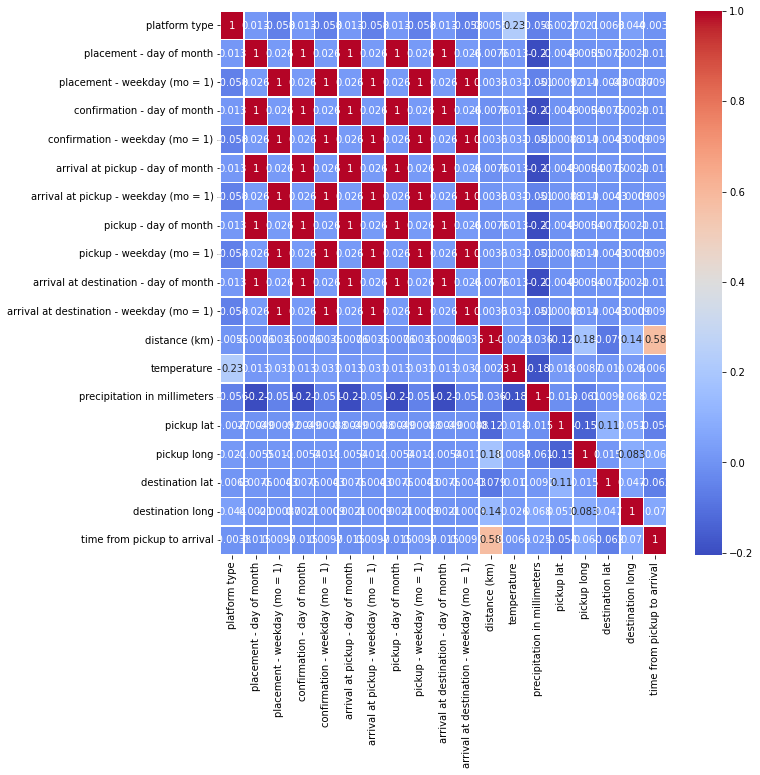

In [34]:


# Then appply filter methods by plotting a correlation matrix
# ---
#
df_corr = df.corr()
plt.figure(figsize=(10,10))

# We then plot our heatmap visualistion
# 
import seaborn as sns
sns.heatmap(df_corr, annot=True, linewidth=0.5, cmap='coolwarm');

In [35]:
# Splitting our dataset  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state = 42)

# Performing normalisation 
norm = MinMaxScaler().fit(X_train) 
X_train = norm.transform(X_train) 
X_test = norm.transform(X_test)

# Fitting in our models   
svm_regressor = SVR(kernel='rbf', C=10)
knn_regressor = KNeighborsRegressor()
dec_regressor = DecisionTreeRegressor(random_state=27)

svm_regressor.fit(X_train, y_train)
knn_regressor.fit(X_train, y_train)
dec_regressor.fit(X_train, y_train)

# Making Predictions  
svm_y_pred = svm_regressor.predict(X_test)
knn_y_pred = knn_regressor.predict(X_test)
dec_y_pred = dec_regressor.predict(X_test)

# Finally, evaluate our model 
print('SVM RMSE:', np.sqrt(metrics.mean_squared_error(y_test, svm_y_pred)))
print('KNN RMSE:', np.sqrt(metrics.mean_squared_error(y_test, knn_y_pred)))
print('Decision Tree RMSE:', np.sqrt(metrics.mean_squared_error(y_test, dec_y_pred)))

SVM RMSE: 867.3293562605307
KNN RMSE: 884.9792622508476
Decision Tree RMSE: 1151.7420650807996


Wrapper Method: Step Forward Feature Selection

In [36]:
# importing six and sys
import six
import sys
sys.modules['sklearn.externals.six'] = six

# installing mlrose
!pip install mlrose
import mlrose

# importing joblib
import joblib
sys.modules['sklearn.externals.joblib'] = joblib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=ec32ddd0139a322a103c57da992e3e0022a4eeaf121dd3b8c17ba58da7d5e8b5
  Stored in directory: /root/.cache/pip/wheels/42/56/cc/4a8bf86613aafd5b7f1b310477667c1fca5c51c3ae4124a003
Successfully built sklearn


In [37]:



# Performing normalisation 
norm = MinMaxScaler().fit(X_train) 
X_train = norm.transform(X_train) 
X_test = norm.transform(X_test)

# Selecting the ML algorithm to use   
dec_regressor = DecisionTreeRegressor(random_state=27)

# We pass the svm_regressor the estimator to the SequentialFeatureSelector function. 
# The k_features specifies the number of features to select. 
# We can set any number of features here. The forward parameter, if set to True, 
# performs step forward feature selection. The verbose parameter is used for logging 
# the progress of the feature selector, the scoring parameter defines the performance 
# evaluation criteria and finally, cv refers to cross-validation folds.
# ---
# Hint: Hover cursor on SequentialFeatureSelector to get a list of more parameter values.
# ---
#
from mlxtend.feature_selection import SequentialFeatureSelector
feature_selector = SequentialFeatureSelector(dec_regressor,
           k_features=4,
           forward=True,
           verbose=2,
           scoring='r2',
           cv=4)
 
# Perform step forward feature selection
feature_selector = feature_selector.fit(X_train, y_train) 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    1.6s finished

[2022-11-22 10:51:13] Features: 1/4 -- score: 0.34358359489505375[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    1.1s finished

[2022-11-22 10:51:14] Features: 2/4 -- score: 0.33455969849640843[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.8s finished

[2022-11-22 10:51:15] Features: 3/4 -- score: 0.3225269042708824[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   

In [38]:
# Which are the selected features?
# The columns at these indexes are those which were selected
# ---
#
feat_cols = list(feature_selector.k_feature_idx_)
print(feat_cols)

[1, 3, 10, 12]


In [39]:
# We can now use those features to build our model
# ---
# 

# Without step forward feature selection (sffs)
dec_regressor = DecisionTreeRegressor(random_state=27)
dec_regressor.fit(X_train, y_train)

# With step forward feature selection
dec_regressor2 = DecisionTreeRegressor(random_state=27)
dec_regressor2.fit(X_train[:, feat_cols], y_train)

# Making Predictions and determining the accuracies
y_test_pred = dec_regressor.predict(X_test)
print('Decision Tree RMSE Without sffs:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

y_test_pred2 = dec_regressor2.predict(X_test[:, feat_cols])
print('Decision Tree RMSE with sffs:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred2)))

Decision Tree RMSE Without sffs: 1151.7420650807996
Decision Tree RMSE with sffs: 814.1990994631424


Feature Transformation: Principal Component Analysis

In [ ]:
y = df_clean['time from pickup to arrival']
X =df_clean[['placement - day of month','placement - weekday (mo = 1)', 
       'confirmation - day of month', 'confirmation - weekday (mo = 1)',
        'arrival at pickup - day of month',
       'arrival at pickup - weekday (mo = 1)', 
       'pickup - day of month', 'pickup - weekday (mo = 1)', 
       'arrival at destination - day of month',
       'arrival at destination - weekday (mo = 1)',
        'distance (km)', 'temperature',
       'precipitation in millimeters', 'pickup lat', 'pickup long',
       'destination lat', 'destination long' ]]

In [40]:
# Splitting our dataset  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state = 42)

# Performing normalisation 
norm = MinMaxScaler().fit(X_train) 
X_train = norm.transform(X_train) 
X_test = norm.transform(X_test)

# Applying PCA
# ---
# NB: PCA relies the feature set and not the label data.
# ---
# 
from sklearn.decomposition import PCA
pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# Fitting in our models   
svm_regressor = SVR(kernel='rbf', C=10)
knn_regressor = KNeighborsRegressor()
dec_regressor = DecisionTreeRegressor(random_state=27)

svm_regressor.fit(X_train, y_train)
knn_regressor.fit(X_train, y_train)
dec_regressor.fit(X_train, y_train)

# Making Predictions  
svm_y_pred = svm_regressor.predict(X_test)
knn_y_pred = knn_regressor.predict(X_test)
dec_y_pred = dec_regressor.predict(X_test)

# Finally, evaluating our models 
print('SVM RMSE:', np.sqrt(metrics.mean_squared_error(y_test, svm_y_pred)))
print('KNN RMSE:', np.sqrt(metrics.mean_squared_error(y_test, knn_y_pred)))
print('Decision Tree RMSE:', np.sqrt(metrics.mean_squared_error(y_test, dec_y_pred)))

SVM RMSE: 868.22855722092
KNN RMSE: 884.984417133662
Decision Tree RMSE: 1129.3778218821221
